In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, mutual_info_classif


#sns.set_theme(style="whitegrid", font_scale=1.1)

In [12]:
# Loading cleaned data
df = pd.read_csv("cleaned_processed.cleveland.csv")
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,False,False,False,False,True,False,True,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,1,False,False,True,False,True,True,False,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,True,False,False,False,True,False,False,False,False


In [13]:
# Train/test: split data

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((237, 18), (60, 18), (237,), (60,))

Training Models:

blah blah explanation & summary will be added here

Model A: Logistic Regression (Baseline)

blah blah explanation

Best Logistic Regression params: {'clf__C': 0.01, 'clf__penalty': 'l2'}

- Logistic Regression (best) -
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.86      0.86      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60

Accuracy : 0.867
Precision: 0.857
Recall   : 0.857
F1       : 0.857
ROC AUC  : 0.944


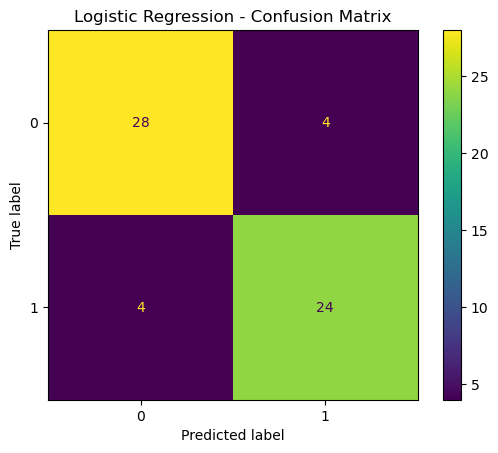

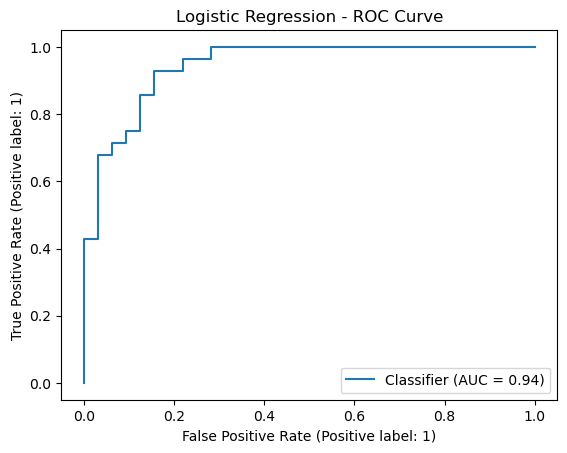

In [ ]:
'''Logistic Regression (Baseline)'''

# Scaling happens inside the pipeline 

# Choose candidate k values that are <= number of features
candidate_ks = [5, 8, 10]
max_features = X_train.shape[1]
ks = [k for k in candidate_ks if k <= max_features]
if not ks:
    # Use all features if dataset too small
    ks = [max_features]


log_reg_pipe = Pipeline([
    # Feature scaling
    ("scaler", StandardScaler()),
    # Feature selection
    ("select", SelectKBest(score_func=mutual_info_classif)),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        solver="liblinear"  # supports l1 and l2
    ))
])

log_reg_param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l1", "l2"],
}

log_reg_grid = GridSearchCV(
    estimator=log_reg_pipe,
    param_grid=log_reg_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

log_reg_grid.fit(X_train, y_train)
log_reg_best = log_reg_grid.best_estimator_

print("Best Logistic Regression params:", log_reg_grid.best_params_)

# Evaluate on test set
y_pred = log_reg_best.predict(X_test)
y_scores = log_reg_best.predict_proba(X_test)[:, 1]

print("\n- Logistic Regression (best) -")
print(classification_report(y_test, y_pred))

log_reg_accuracy  = accuracy_score(y_test, y_pred)
log_reg_precision = precision_score(y_test, y_pred)
log_reg_recall    = recall_score(y_test, y_pred)
log_reg_f1        = f1_score(y_test, y_pred)
log_reg_roc_auc   = roc_auc_score(y_test, y_scores)

print(f"Accuracy : {log_reg_accuracy:.3f}")
print(f"Precision: {log_reg_precision:.3f}")
print(f"Recall   : {log_reg_recall:.3f}")
print(f"F1       : {log_reg_f1:.3f}")
print(f"ROC AUC  : {log_reg_roc_auc:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_scores)
plt.title("Logistic Regression - ROC Curve")
plt.show()

log_reg_metrics = {
    "model": "Logistic Regression (best)",
    "accuracy": log_reg_accuracy,
    "precision": log_reg_precision,
    "recall": log_reg_recall,
    "f1": log_reg_f1,
    "roc_auc": log_reg_roc_auc,
}

Model B: Decision Tree

blah blah explanation

Model C: Random Forest

blah blah explanation

Best Random Forest params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

- Random Forest (best) -
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Accuracy : 0.850
Precision: 0.852
Recall   : 0.821
F1       : 0.836
ROC AUC  : 0.933


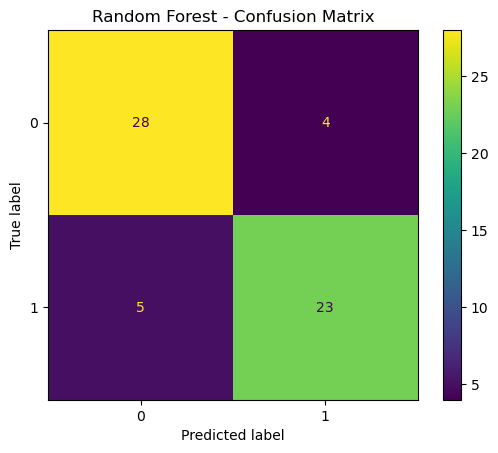

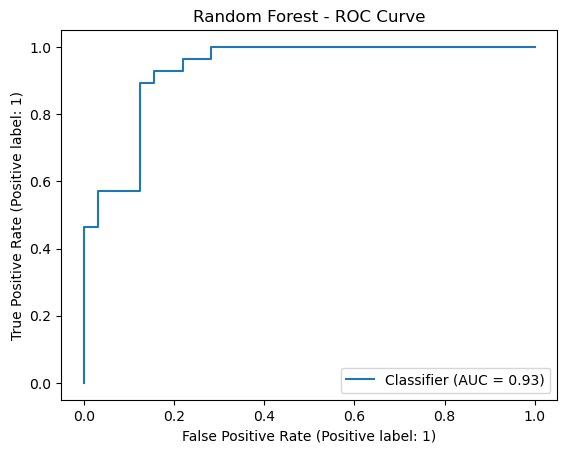

In [15]:
'''Random Forest model'''

rf_clf = RandomForestClassifier(
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
}

rf_grid = GridSearchCV(
    estimator=rf_clf,
    param_grid=rf_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

print("Best Random Forest params:", rf_grid.best_params_)

# Evaluate on test set
y_pred = rf_best.predict(X_test)
y_scores = rf_best.predict_proba(X_test)[:, 1]

print("\n- Random Forest (best) -")
print(classification_report(y_test, y_pred))

rf_accuracy  = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall    = recall_score(y_test, y_pred)
rf_f1        = f1_score(y_test, y_pred)
rf_roc_auc   = roc_auc_score(y_test, y_scores)

print(f"Accuracy : {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall   : {rf_recall:.3f}")
print(f"F1       : {rf_f1:.3f}")
print(f"ROC AUC  : {rf_roc_auc:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Random Forest - Confusion Matrix")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_scores)
plt.title("Random Forest - ROC Curve")
plt.show()

rf_metrics = {
    "model": "Random Forest (best)",
    "accuracy": rf_accuracy,
    "precision": rf_precision,
    "recall": rf_recall,
    "f1": rf_f1,
    "roc_auc": rf_roc_auc,
}

Model D: Support Vector Machine

blah blah explanation

Model E: kNN

blah blah explanation